# Support Vector Machines

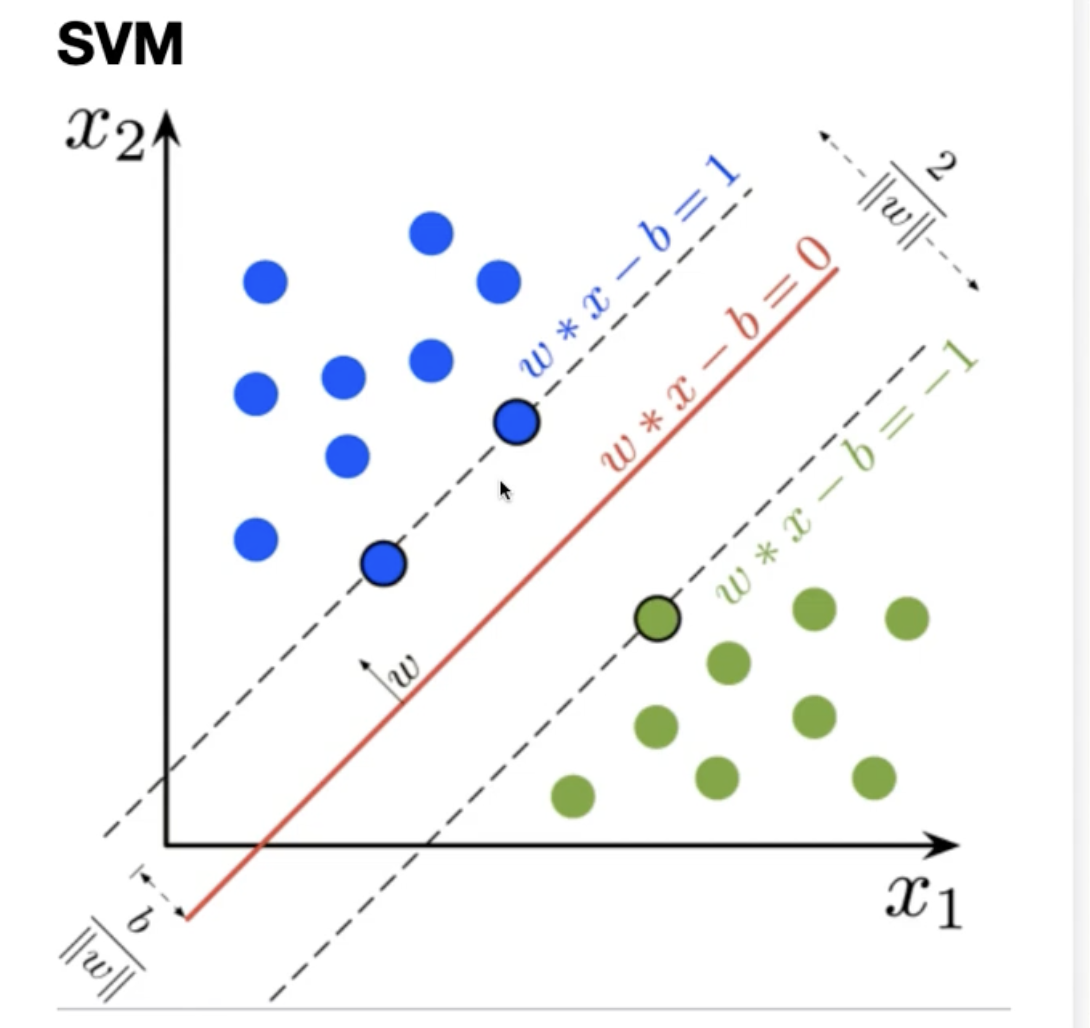

The **SVM** is a popular ML algorithm, it follows the idea of using a linear model to find a **decision boundary, or hyperplane**, that best separates the data.

The choice of the best hyperplane is the one that represents the largest separation between classes.

We choose the hyperplane such that the distance between itself and the nearest data instance of either class is maximized.

The hyperplane must satisfy the following equation:

$w \cdot x - b = 0$

We want to find the hyperplane such that the distance to either class is maximized, $\frac{b}{||w||}$. For example, given classes -1, 1:

* $ w \cdot x - b = 1 $

* $ w \cdot x - b = -1 $

* $ \frac{2}{||w||}$


# Linear Model
We use the linear model:

$ w \cdot x - b = 0$

Our function should also satisfy the following conditions:

$ w \cdot x_i - b \geq$ 1 if $y_i = 1 $

$ w \cdot x_i -b \leq -1 $ if $y_i = -1$

that is, all class 1 samples must lie on the left of $ w \cdot x - b = 1 $,

and all class -1 samples must lie on the right of $ w \cdot x - b = -1 $.

Combining the equations, we get:

$ y_i (w \cdot x - b) \geq 1$

that is, we multiply our linear function by the class label. This becomes the condition that we want to satisfy.

# Cost Function
To find $w,b$ parameters, we use a **cost function** to which we apply **gradient descent**.

The cost function we use is the **Hinge Loss**:

$L = max(0, 1 - y_i (w \cdot x_i - b))$

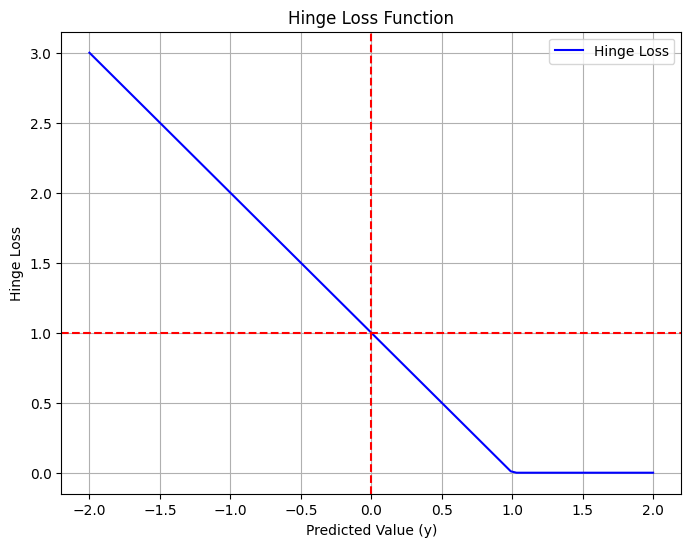

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of predicted values
y_hat = np.linspace(-2, 2, 100)

# Define the true label
y_true = 1  # Assume the true label is +1

# Compute the hinge loss
hinge_loss = np.maximum(0, 1 - y_true * y_hat)

# Plot the hinge loss function
plt.figure(figsize=(8, 6))
plt.plot(y_hat, hinge_loss, label="Hinge Loss", color="blue")
plt.axvline(x=0, linestyle="--", color="red")#, label="Decision Boundary")
plt.axhline(y=1, linestyle="--", color="red") #, label="Decision Boundary"))
plt.title("Hinge Loss Function")
plt.xlabel("Predicted Value (y)")
plt.ylabel("Hinge Loss")
plt.legend()
plt.grid(True)
plt.show()


$ L = 0$ if $y \cdot f(x) \geq 1$,

$1 - y \cdot f(x)$ otherwise.


If $y, f(x)$ are correctly classified, then the loss is equal to $0$, meaning in the image above, for each class, if it lies on the respective side, then the loss is $0$.

We also wish to maximize the margin between the classes and the decision boundary. In the example, the margin is $\frac{2}{||w||}$, which is dependent on the weight vector, we wish to maximize it and reduce the magnitude of the weight parameter. Thus, we add a **regularization** term , $\lambda ||w||^2 $, to our loss function.

# Regularization

$J = \lambda ||w||^2 + \frac{1}{n} \sum_{i=1}^n max(0, 1- y_i(w\cdot x_i -b))$

If $y_i \cdot f(x) \geq 1$:

$J_i = \lambda ||w||^2 $

else:
$J_i = \lambda ||w||^2 + 1- y_i(w\cdot x_i -b)$

The **lambda** parameter seek to find a trade-off between the two terms (seeking to find out which is more important), i.e. we want a decision boundary which not only correctly classifies, but also finds the maximum margin boundary.

# Gradients

If $y_i \cdot f(x) \geq 1$:

* $\frac{dJ_i}{dw_k} = 2\lambda w_k$
* $\frac{dJ_i}{db} = 0$

else:
* $\frac{dJ_i}{dw_k} = 2\lambda w_k - y_i x_i$
* $\frac{dJ_i}{db} = y_i$

# Update rule
For each training sample $x_i$:

$ w = w - \alpha \cdot dw$

$ b = b - \alpha \cdot db$

More generally, our model consists of:

$ f(x) = w^Tx  - b = \vec{0} $,

and

$ y_i \cdot (w^Tx_i - b) \geq 1$.





# Implementation: Linear Kernel

In [ ]:
import numpy as np


class SVM:

  def __init__(self, lr: float = 0.01, lambda_param: float = 0.01, n_iters: int = 100):
    self.lr = lr
    self.lambda_param = lambda_param
    self.n_iters = n_iters

    # come up with weights, biases later:
    self.w = None
    self.b = None


  def fit(self, X, y):
    # we want to make sure y is either -1 or 1 only:
    y_ = np.where(y <= 0, -1, 1)

    n_samples, n_features = X.shape

    self.w = np.zeros(n_features) # w is again, a vector
    self.b = 0

    # gradient descent:

    for _ in range(self.n_iters):
      # iterate over our training samples
      # current index, sample
      for idx, x_i in enumerate(X):
        # compute derivative wrt w and b, 1st cehck if y_i * f(x)>= 1
        condition = y_[idx] * np.dot(x_i, self.w) + self.b  >= 1
        if condition:
          self.w -= self.lr * (2 * self.lambda_param * self.w)
        else:
          self.w -= self.lr * (2* self.lambda_param * self.w - np.dot(x_i, y_[idx]))
          self.b -= self.lr * y_[idx]


  def predict(self, X):
    # we apply the linear model wx - b = 0, look at the sign and
    # if wx_i - b >= 1 if y_i = 1, wx_i - b <= -1 if y_i = -1
    linear_output = np.dot(X, self.w) - self.b
    # we choose the sign to predict:
    return np.sign(linear_output)




# Testing

f(x) = [0.72505352 0.18922911] x - -0.17300000000000013
Testing accuracy: 1.0


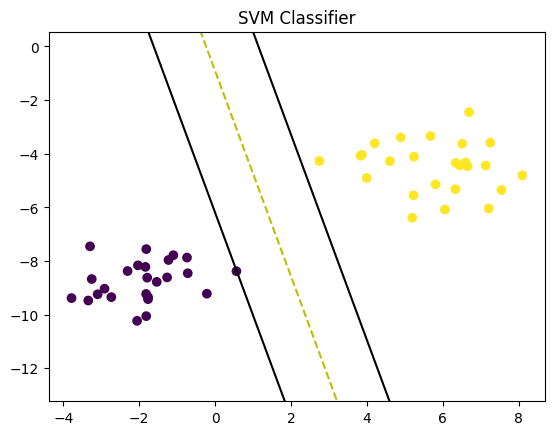

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



X, y = datasets.make_blobs(n_samples = 50, n_features = 2 , centers = 2, cluster_std= 1.05, random_state = 40)
y = np.where(y ==0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 1234)


svm = SVM(lr = 0.001, n_iters = 1000)
svm.fit(X_train,y_train)
# predictions
predictions = svm.predict(X_test)


print(f'f(x) = {svm.w} x - {svm.b}')

def accuracy(y_true, y_pred):
  return np.sum(y_true == y_pred) / float(len(y_true))

accuracy = accuracy(y_test, predictions)

print(f'Testing accuracy: {accuracy}')


def visualize_svm():
  def get_hyperplane_value(x,w,b, offset):
    return (-w[0] * x + b + offset) / w[1]

  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  plt.scatter(X[:,0], X[:,1], marker = 'o', c = y)


  x0_1 = np.amin(X[:,0])
  x0_2 = np.amax(X[:,0])

  x1_1 = get_hyperplane_value(x0_1, svm.w, svm.b, 0)
  x1_2 = get_hyperplane_value(x0_2, svm.w, svm.b, 0)

  x1_1_m = get_hyperplane_value(x0_1, svm.w, svm.b, -1)
  x1_2_m = get_hyperplane_value(x0_2, svm.w, svm.b, -1)

  x1_1_p = get_hyperplane_value(x0_1, svm.w, svm.b, 1)
  x1_2_p = get_hyperplane_value(x0_2, svm.w, svm.b, 1)

  ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
  ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')
  ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')

  x1_min = np.amin(X[:,1])
  x1_max = np.amax(X[:,1])


  ax.set_ylim([x1_min -3, x1_max + 3])

  plt.title('SVM Classifier')
  plt.show()

visualize_svm()